In [61]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import numpy as np

start=dt.datetime(2010,1,1)
end=dt.datetime.now()

ms=web.DataReader('AAPL','yahoo',start,end)

In [62]:
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

In [63]:
ms['LogReturn1'] = np.log(ms['Close']/ms['Close'].shift(1))

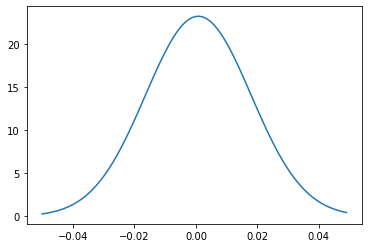

In [64]:
import matplotlib.pyplot as plt
from scipy.stats import norm 

mean=ms['LogReturn'].mean()
std=ms['LogReturn'].std()
count=ms['LogReturn'].count()

density=pd.DataFrame()
# density['x']=np.arange(ms['LogReturn'].min(),ms['LogReturn'].max(),0.001)
density['x']=np.arange(-0.05,0.05,0.001)
density['pdf']=norm.pdf(density['x'],mean,std)

plt.plot(density['x'],density['pdf'])
# plt.hist(ms['LogReturn'],50)
plt.show()

In [65]:
probreturn1=norm.cdf(-0.05,mean,std)
probreturn1

0.0015512566795024046

In [66]:
VAR_5=norm.ppf(0.05,mean,std)
VAR_5

-0.027461258727325247

In [57]:
# Confidence inteval with 95.5% confidence

In [69]:
lower=mean-2*std/np.sqrt(count)
upper=mean+2*std/np.sqrt(count)